# Jupyter Data Science Workflow

Tutorial


In [12]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
plt.style.use('seaborn')
from urllib.request import urlretrieve

In [11]:
from workflow.data import  get_data

NameError: name 'URL' is not defined

In [3]:
data = get_data()

In [4]:
data.head()

,East,West,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


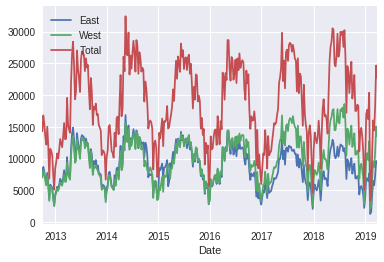

In [5]:
data.resample('W').sum().plot()

(0, 1100992.6)

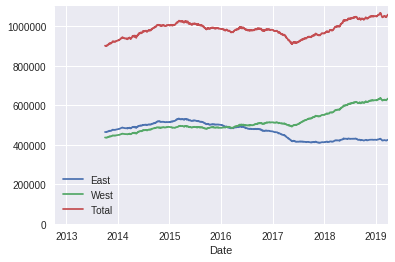

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

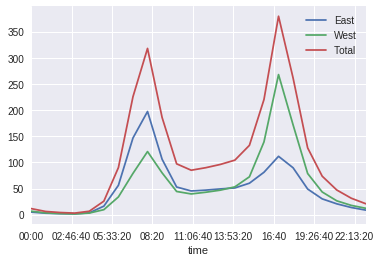

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [9]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


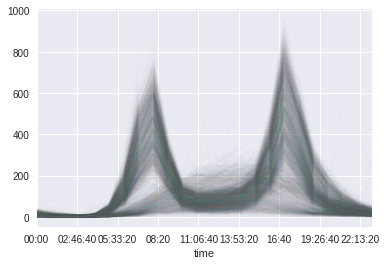

In [10]:
pivoted.plot(legend=False, alpha=0.01)